# **Coffee Shop Regression — Instructor Answer Key**
This notebook provides a full worked-out solution for the Coffee Shop Revenue Modeling assignment.
It includes simple regression, multiple regression, and diagnostic plots.

---

## 1. Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot

from google.colab import files
uploaded = files.upload()

Saving coffee_shop_daily-1 (1).csv to coffee_shop_daily-1 (1).csv


## 2. Simple Linear Regression — `Daily_Revenue ~ Foot_Traffic`

In [ ]:
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv("/content/coffee_shop_daily-1 (1).csv")

X = df["Foot_Traffic"]
y = df["Daily_Revenue"]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

intercept = model.params["const"]
slope = model.params["Foot_Traffic"]
r2 = model.rsquared
adj_r2 = model.rsquared_adj
p_values = model.pvalues

print("\n--- Interpretation ---")
print(f"Intercept: {intercept:.2f}")
print(f"Slope: {slope:.2f}")
print(f"R²: {r2:.3f}")
print(f"Adjusted R²: {adj_r2:.3f}")
print(f"P-values:\n{p_values}")

                            OLS Regression Results                            
Dep. Variable:          Daily_Revenue   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     693.0
Date:                Thu, 30 Oct 2025   Prob (F-statistic):           9.06e-74
Time:                        16:56:45   Log-Likelihood:                -1918.2
No. Observations:                 250   AIC:                             3840.
Df Residuals:                     248   BIC:                             3847.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1455.2356     79.126     18.391   

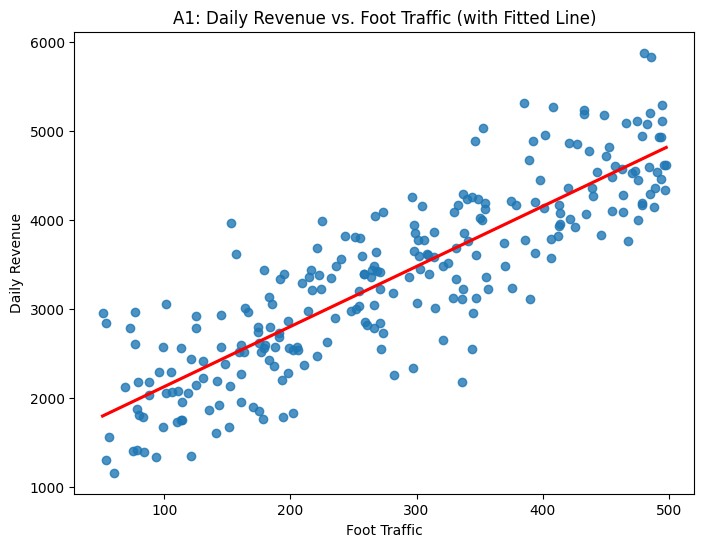

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.regplot(
    x="Foot_Traffic",
    y="Daily_Revenue",
    data=df,
    ci=None,
    line_kws={"color": "red"}
)
plt.title("A1: Daily Revenue vs. Foot Traffic (with Fitted Line)")
plt.xlabel("Foot Traffic")
plt.ylabel("Daily Revenue")


plt.savefig("a1_simple_regression.png", dpi=300, bbox_inches="tight")
plt.show()

## 3. Multiple Linear Regression

In [ ]:
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv("/content/coffee_shop_daily-1 (1).csv")

X = df[["Foot_Traffic", "Avg_Ticket", "Promo_Discount_Pct", "Temp_C", "Rain_mm", "Weekend"]]
y = df["Daily_Revenue"]

X = sm.add_constant(X)

model_b1 = sm.OLS(y, X).fit()

print(model_b1.summary())

print("\n--- Interpretation ---")
print("Coefficients:")
print(model_b1.params)
print("\nSigns of coefficients show direction of effect:")
print("(Positive = increases Daily_Revenue, Negative = decreases Daily_Revenue)\n")

print("Statistical significance (p-values):")
print(model_b1.pvalues)

print(f"\nModel fit:")
print(f"R² = {model_b1.rsquared:.3f}")
print(f"Adjusted R² = {model_b1.rsquared_adj:.3f}")

                            OLS Regression Results                            
Dep. Variable:          Daily_Revenue   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     159.9
Date:                Thu, 30 Oct 2025   Prob (F-statistic):           2.03e-81
Time:                        16:59:07   Log-Likelihood:                -1885.0
No. Observations:                 250   AIC:                             3784.
Df Residuals:                     243   BIC:                             3809.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                558.7574    185

In [ ]:
with open("b1_multiple_regression_summary.txt", "w") as f:
    f.write(model_b1.summary().as_text())

print("✅ Exported: b1_multiple_regression_summary.txt")

✅ Exported: b1_multiple_regression_summary.txt


## 4. Diagnostics

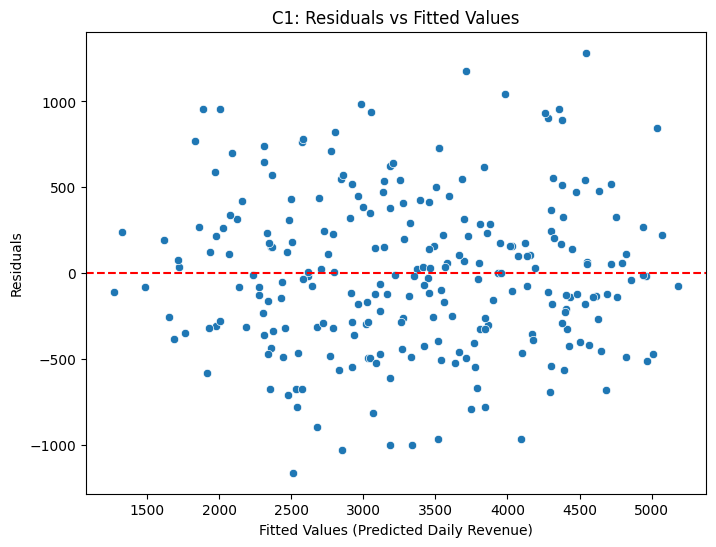

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fitted_vals = model_b1.fittedvalues
residuals = model_b1.resid

plt.figure(figsize=(8,6))
sns.scatterplot(x=fitted_vals, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("C1: Residuals vs Fitted Values")
plt.xlabel("Fitted Values (Predicted Daily Revenue)")
plt.ylabel("Residuals")

plt.savefig("c1_residuals_vs_fitted.png", dpi=300, bbox_inches="tight")
plt.show()

<Figure size 600x600 with 0 Axes>

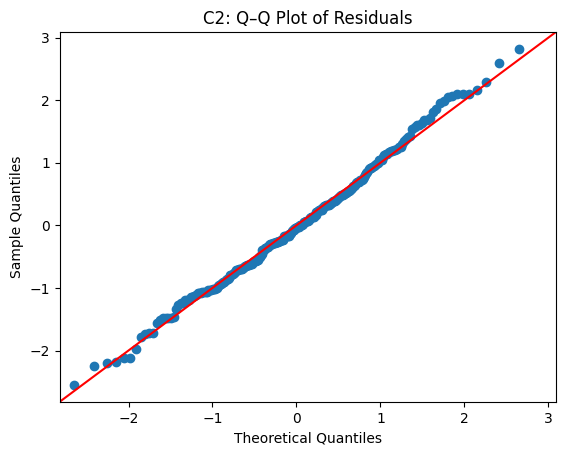

In [ ]:
import statsmodels.api as sm

plt.figure(figsize=(6,6))
sm.qqplot(residuals, line='45', fit=True)
plt.title("C2: Q–Q Plot of Residuals")

plt.savefig("c2_qqplot.png", dpi=300, bbox_inches="tight")
plt.show()

The Residuals vs Fitted plot demonstrates a good plot because it is randomly scattered with relatively equal spread. The Q-Q plot demonstrates a 45º line that satisfies the normality assumption.

# Part D


The predictors that most strongly predict daily revenue are foot traffic and average ticket. This is because foot traffic refers to the number of individuals and more customers means more money spent per person, and average ticket size refers to a baseline number of paying individuals that produces more revenue the higher the number.

The multiple linear regression model is better because it provides more data that gives more insight why some days or time periods produce more money due to it being busier. It accounts for factors like weather or the day of the week or special events happening that would influence more business. This extended information would allow the business to pinpoint ways to uplift low business traffic times with things like promos and discounts and accomodate for greater resources during heavy business times to support customer spending.

Piggybacking off of that, a potentially beneficial aspect to add would be an interaction term that showed the relationship between certain predictors and how they effect each other. For example, discounts and promos will draw in more customers, but you are still sacrificing a level of revenue by selling at a lower price than normal. Adding an interaction term could allow businesses to play around with the numbers to determine the proper level of discounts they need to provide to draw in more customers while still making enough revenue on it to make a profit.



#Export

In [ ]:
from google.colab import files
import os
import zipfile

zip_filename = "modeling_exports.zip"

with zipfile.ZipFile(zip_filename, "w") as zipf:
    for ext in ["png", "html", "txt"]:
        for file in os.listdir("/content"):
            if file.endswith(ext):
                zipf.write(file)


files.download(zip_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>